# 튜토리얼 1 - Exploratoru Data Analysis, Visualization, Machine Learning 

튜토리얼에서 사용할 여러 라이브러리들을 정의한다. 

In [1]:
##데이터 분석화 도구
import numpy as np
import pandas as pd
## 여러 시각화 도구 (matplotlib, seaborn, plotly)
import matplotlib.pyplot as plt
import seaborn as sns

**plot 출력을 위해 pandas Series 형태의 데이터를 임의로 만들어서 스타일시트를 확인해보도록 한다.

함수: plt.style.use("스타일시트")
(seaborn 값: 좌표값이 존재하는 그래프), (default 값: 우리가 자주 보는 막대 그래프)

In [2]:
#import missingno as msno
import warnings

plt.style.use('fivethirtyeight') #전문적인 데이터시각화 툴
warnings.filterwarnings('ignore')
%matplotlib inline #그래프를 노트북에 출력한다. 

UsageError: unrecognized arguments: #그래프를 노트북에 출력한다.


### 1. 데이터셋 확인 프로세스

pandas 라이브러리를 사용하여 데이터셋의 간단한 통계적 분석, 복잡한 처리들을 간단한 메소드를 사용하여 나타낸다. 

In [45]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 문제에서 다루려는 feature값은 
Pclass(타겟의 클래스), Age, sibsp(함께 탑승한 형제와 배우자의 수), Parch(함께 탑승한 부모, 아이의 수), Fare(탑승료)이며 
예측하려는 모델은 **survived**이다.

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


이것들이 어떤 DATA를 보여주는지 잘 모르겠다!!!!!!

#### <더 자세히 확인하기 위한 시각화 모델>

In [7]:
df_train.shape[0] #한 필드 당 행의 개수

891

In [8]:
#NULL 값 Check Model (df_train에서 !!)

for col in df_train.columns: #데이터의 필드값들을 하나씩 봐보자 ! (PassengerId, Pclass, Age, 등)
    #각 필드마다 Null 값의 Percentage를나타내주는 식 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() 
                                                                              / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


Null 값의 분포가 Age, Cabin, Embarked에 분포되어 있다는 것을 확인할 수 있다. 
하지만, 우리가 사용할 필드는 Age만 해당하며 Null 값은 19.87%를 차지한다. 

In [9]:
df_test.shape[0]

418

In [10]:
#NULL 값 Check Model (df_test에서!!)

for col in df_test.columns: #데이터의 필드값들을 하나씩 봐보자 ! (PassengerId, Pclass, Age, 등)
    #각 필드마다 Null 값의 Percentage를나타내주는 식 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() 
                                                                              / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


Null 값의 분포가 Age, Cabin, Fare에 분포되어 있다는 것을 확인할 수 있다. 
하지만, 우리가 사용할 필드는 Age와 Fare이고 Null 값은 각각 20.57%, 0.24%를 차지한다. 

df_test와 df_train에 존재하는 행의 수에 많은 차이가 나며, null 값의 분포도 비슷하지만 
약간의 차이를 확인할 수 있다. 

### 2. Target Label 확인

target label이 어떤 distribution을 가지고 있는지 확인한다. (분포도를 나타낸다.)

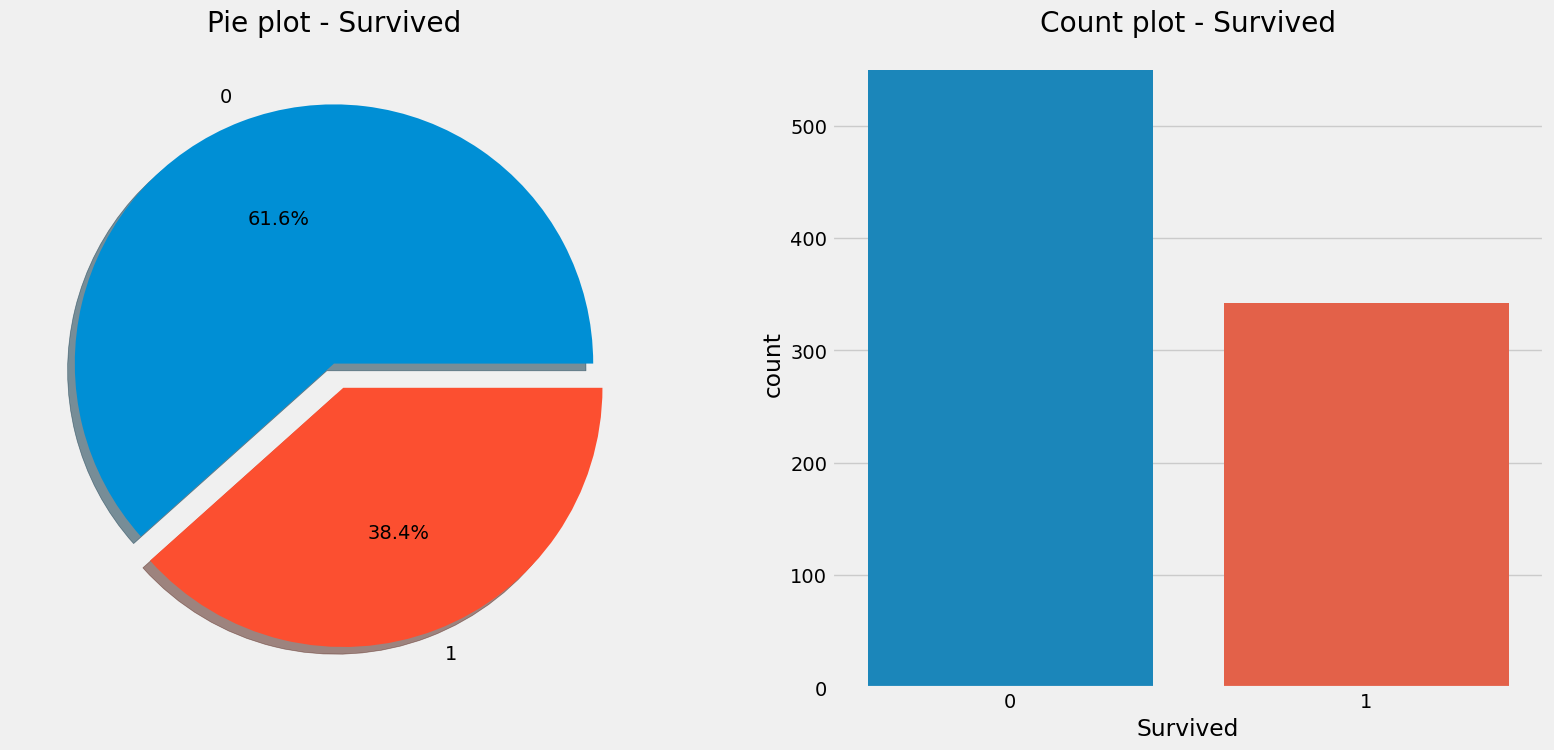

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #f = figure 객체, ax = 2개의 축 객체를 담고 있는 배열 

#ax[0]에 들어갈 값 (파이차트)
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

#Survived 38.4%, Died 61.6%를 알 수 있다. 
#explode 파라미터를 사용하여 두번째 조각을 시각 상 0.1 정도 띄운다. 
#autopct 자동으로 백분율을 나타내준다. 

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

#ax[1]에 들어갈 값 (막대그래프)
sns.countplot(x = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### 3. 본격적인 데이터 분석

안에 숨겨진 사실을 찾아내기 위하여 적절한 시각화가 필요하다. 

**시각화 라이브러리: matplotlib, seaborn, plotly

#### 3-1. pClass (타켓의클래스) 

Pclass는 ordinal, 서수형 데이터이다.
**카테고리이면서 순서가 있는 데이터 타입

원리: pClass, Survived를 가져온 후, pClass로 묶은 뒤, 각 클래스마다 평균을 내어 생존률을 나타낸다. 
**count() 함수 사용

In [12]:
#class별 사람의 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
#class별 생존한 사람의 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
#pandas의 crosstab을 사용하여 과정을 나타낸다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


분석: Pclass 01 중 생존자 136명, 02 중 생존자 87명, 03 중 생존자는 119명으로 
확연하게 Pclass 01이 생존자가 많다는 것을 알 수 있다. 

<Axes: xlabel='Pclass'>

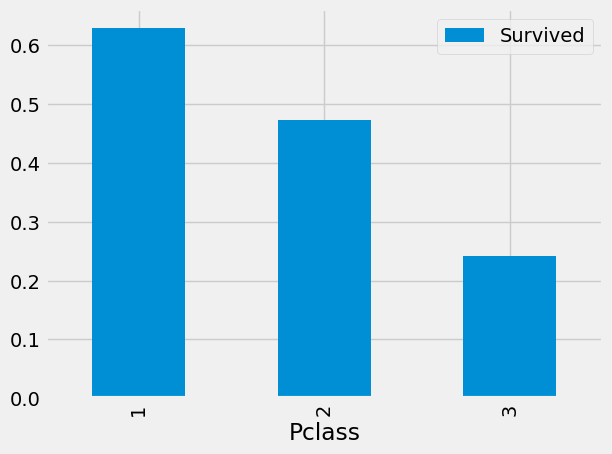

In [15]:
#각 클래스 별 생존자의 평균을 통해서 막대그래프를 나타낸다.  (ascending: 오름차순으로 나타낼 것인지 물어보는 것 !!)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending = False).plot.bar()

Pclass가 좋을수록 생존률이 높은 것을 알 수 있다. 

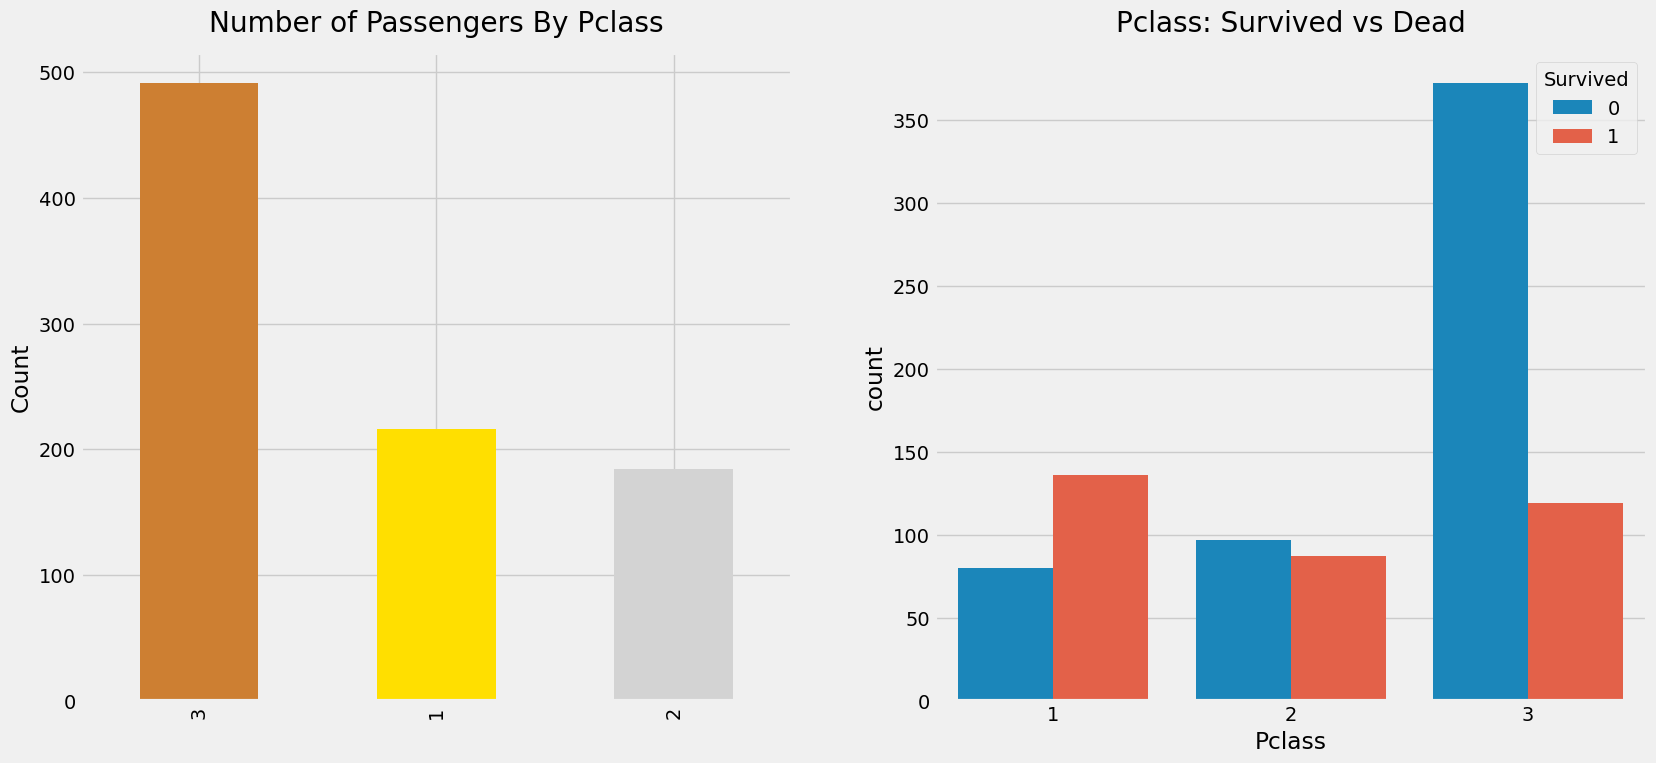

In [16]:
##Pclass의 고객 수 그래프와 생존률/사망률 그래프 분석하기
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
#Pclass를 색깔별로 나타낸다. 
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', "#D3D3D3"], ax=ax[0])
ax[0].set_title("Number of Passengers By Pclass", y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

#### 3-2 성별 데이터 분석

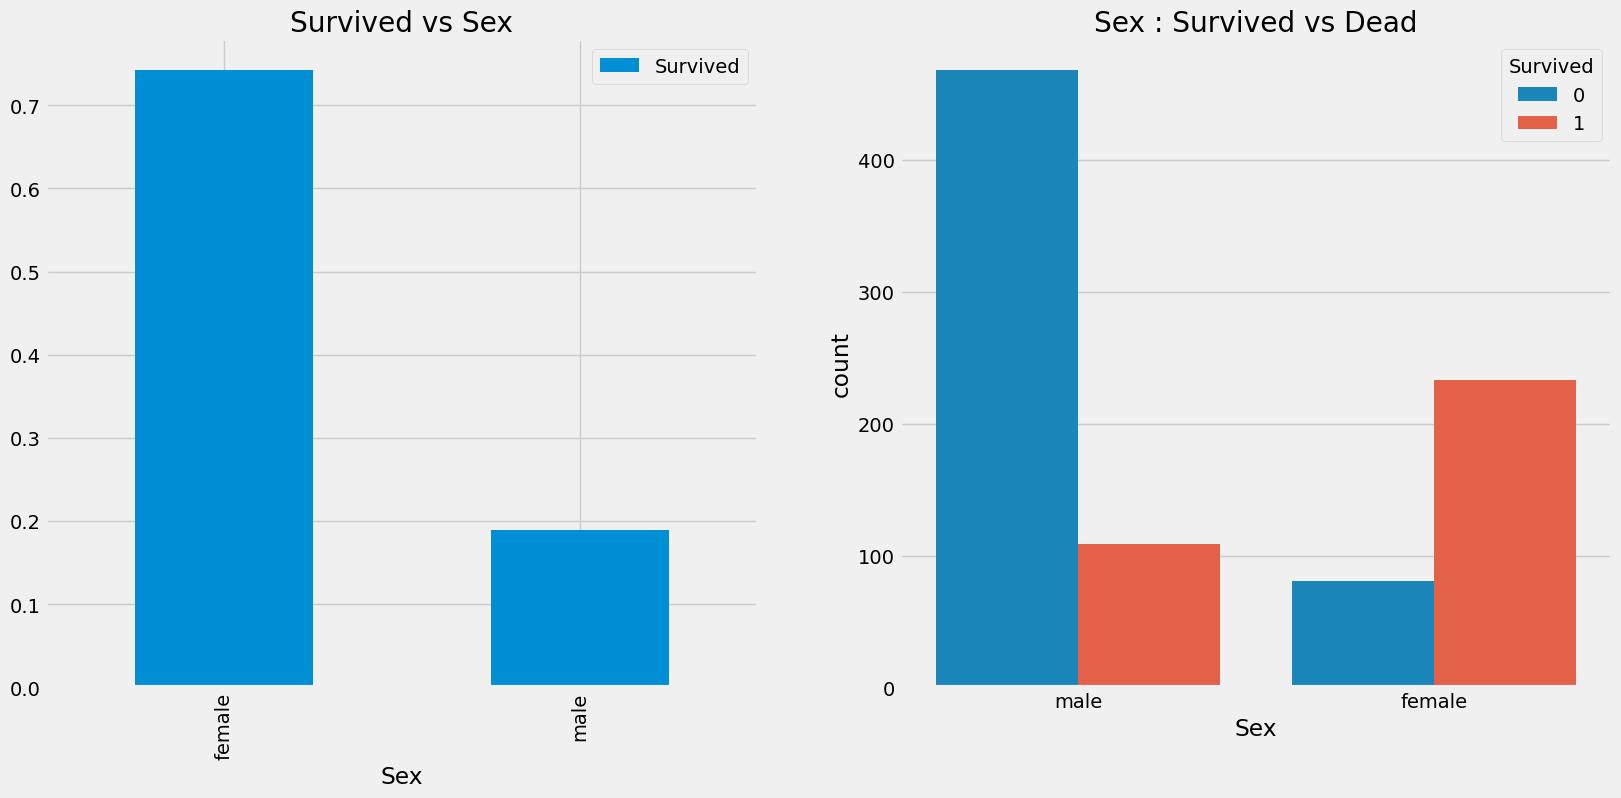

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

여성 생존률이 남성 생존률보다 훨씬 높다는 것을 확인할 수 있다. 

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### 3-3 나이 데이터 분석

In [19]:
print('제일 나이 많은 탑승객 : {:.1f}세'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f}세'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0세
제일 어린 탑승객 : 0.4세
탑승객 평균 나이 : 29.7세


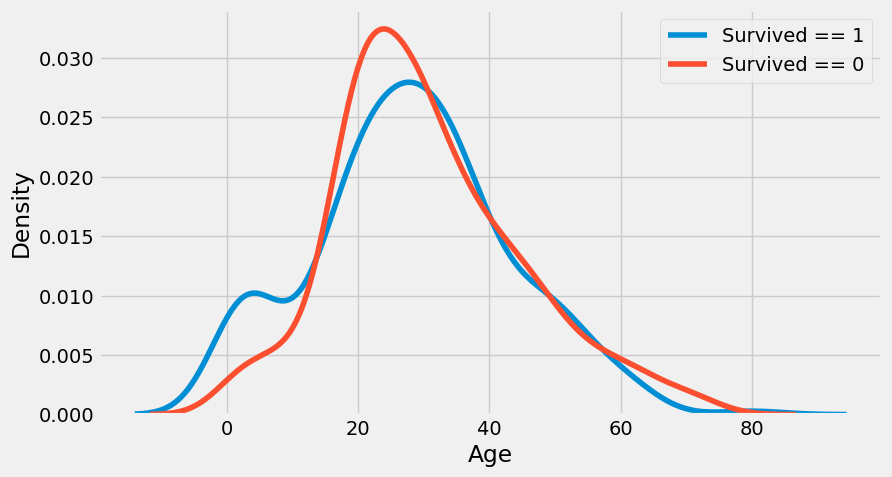

In [20]:
#나이별로 생존자와 사망률 분석 
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']== 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

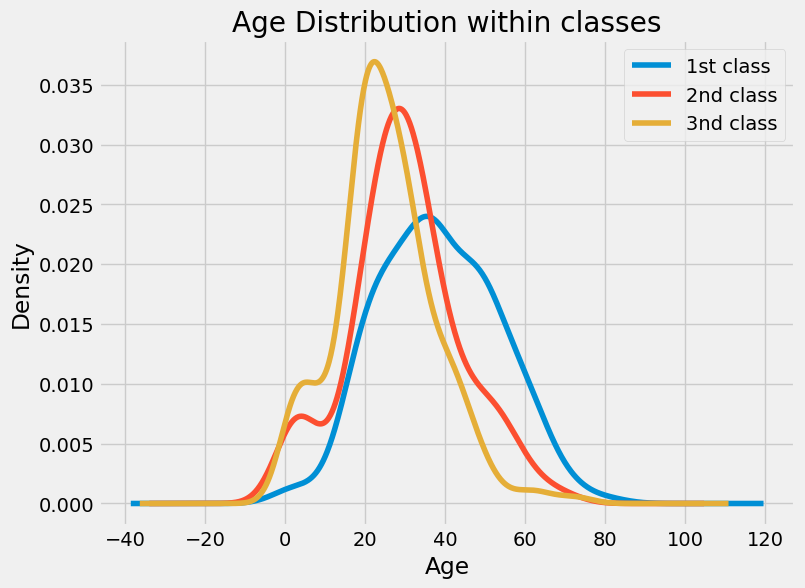

In [21]:
##클래스 별 나이 분포도
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']==3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3nd class'])

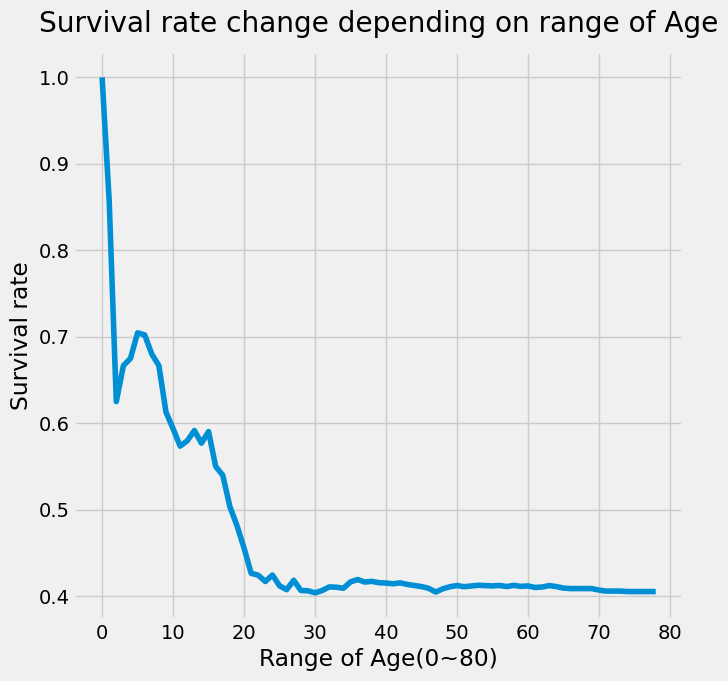

In [22]:
#더 자세한 나이별 분포도를 보기 위해서 반복문으로 나이 범위를 넓혀가며 생존률을 확인한다.

cummulate_survival_ratio = []
for i in range(1, 80): #1살부터 80살까지 나이를 출력한다. 
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()
                                   /len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~80)')
plt.show()

#### 3-4 성별 데이터 분석

##### 데이터 프레임에 오류가 날 시에, x, y축을 정확하게 지정해서 코드를 구현해야한다 !!!!

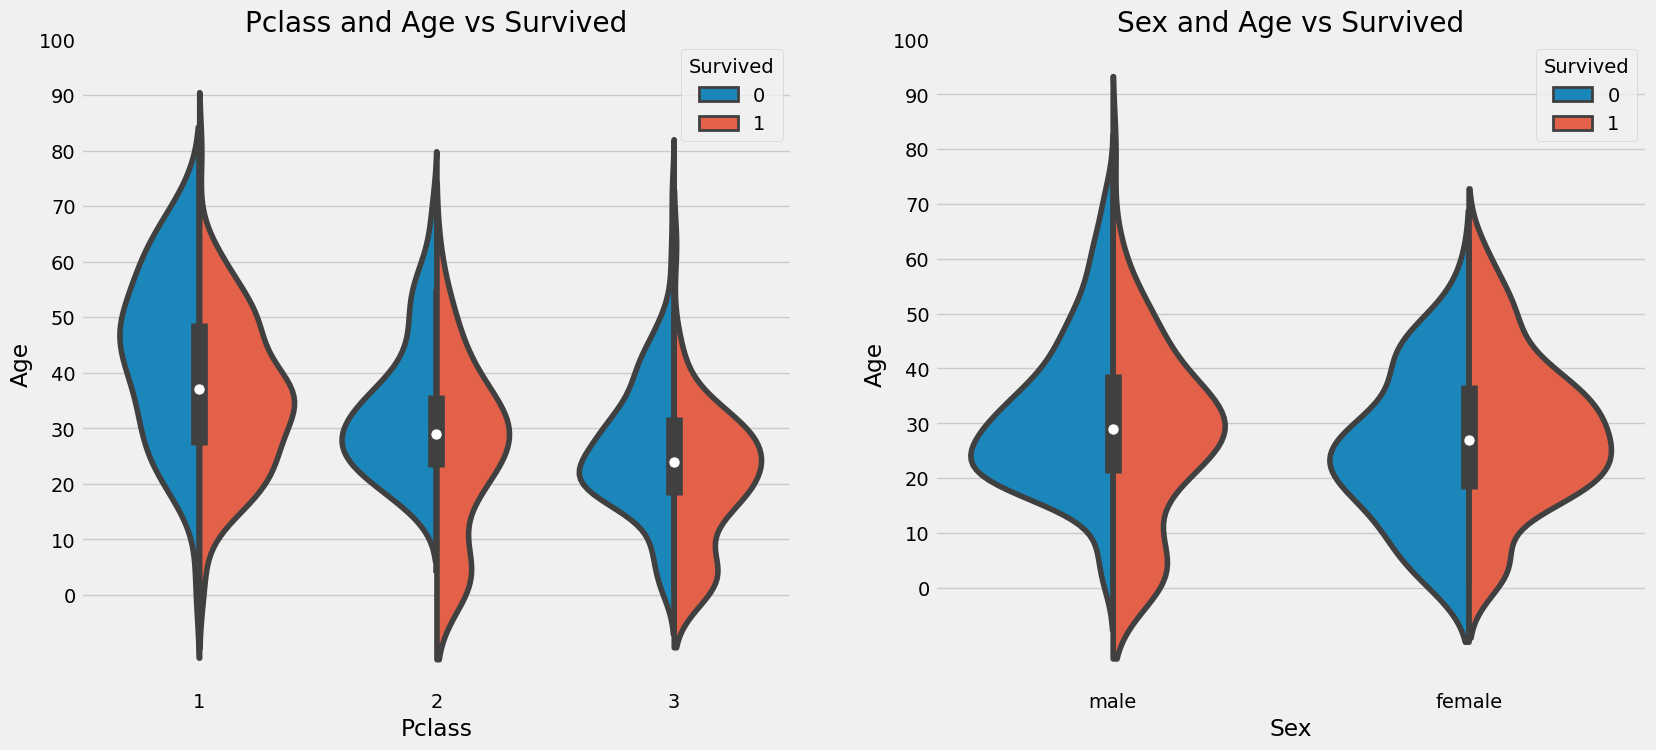

In [53]:
#1행 2열 = 2가지 그래프를 보여주겠다.
#18 * 8 인치 그림 크기를 가진다. 
#그림 객체는 f에, 서브플롯 축 객체는 ax 배열에 반환한다. 
f,ax=plt.subplots(1,2,figsize=(18,8))
#Survived를 기준으로 PClass를 바이올린 형태의 그래프로 보여준다.
#ax[0] = 첫 번째 서브플롯 (Pclass를 첫번째 그래프에 나타내겠다.)
#y축은 Age 관련된 축이다. 
#split은 범주를 나타내는데, 생존여부를 범주로 표시하겠다. 
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=df_train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
#서브플롯의 y축 눈금을 0 ~ 110까지로 간격 10으로 눈금 위치를 지정한다.
ax[0].set_yticks(range(0,110,10))
#동일하게 진행, 그대신 ax[1]에 Sex에 따른 생존여부를 그래프로 표현한다. 
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df_train, split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#**오류는 df_train data프레임을 읽지 못해서 발생한다. (해결불가)

#### 3-5 탑승 항구 분석

<Axes: xlabel='Embarked'>

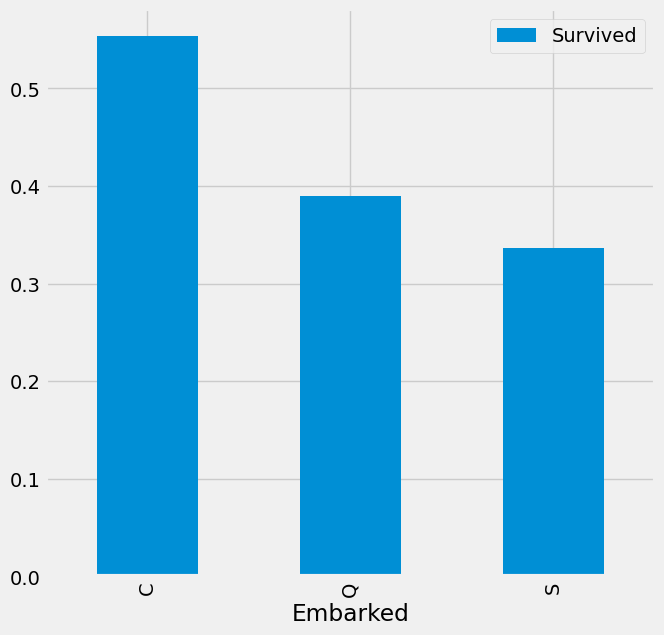

In [43]:
#각 항구별 생존자의 평균을 통해서 막대그래프를 나타낸다.  (ascending: 오름차순으로 나타낼 것인지 물어보는 것 !!)
#ax 축에 ax 그래프를 그린다. 
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

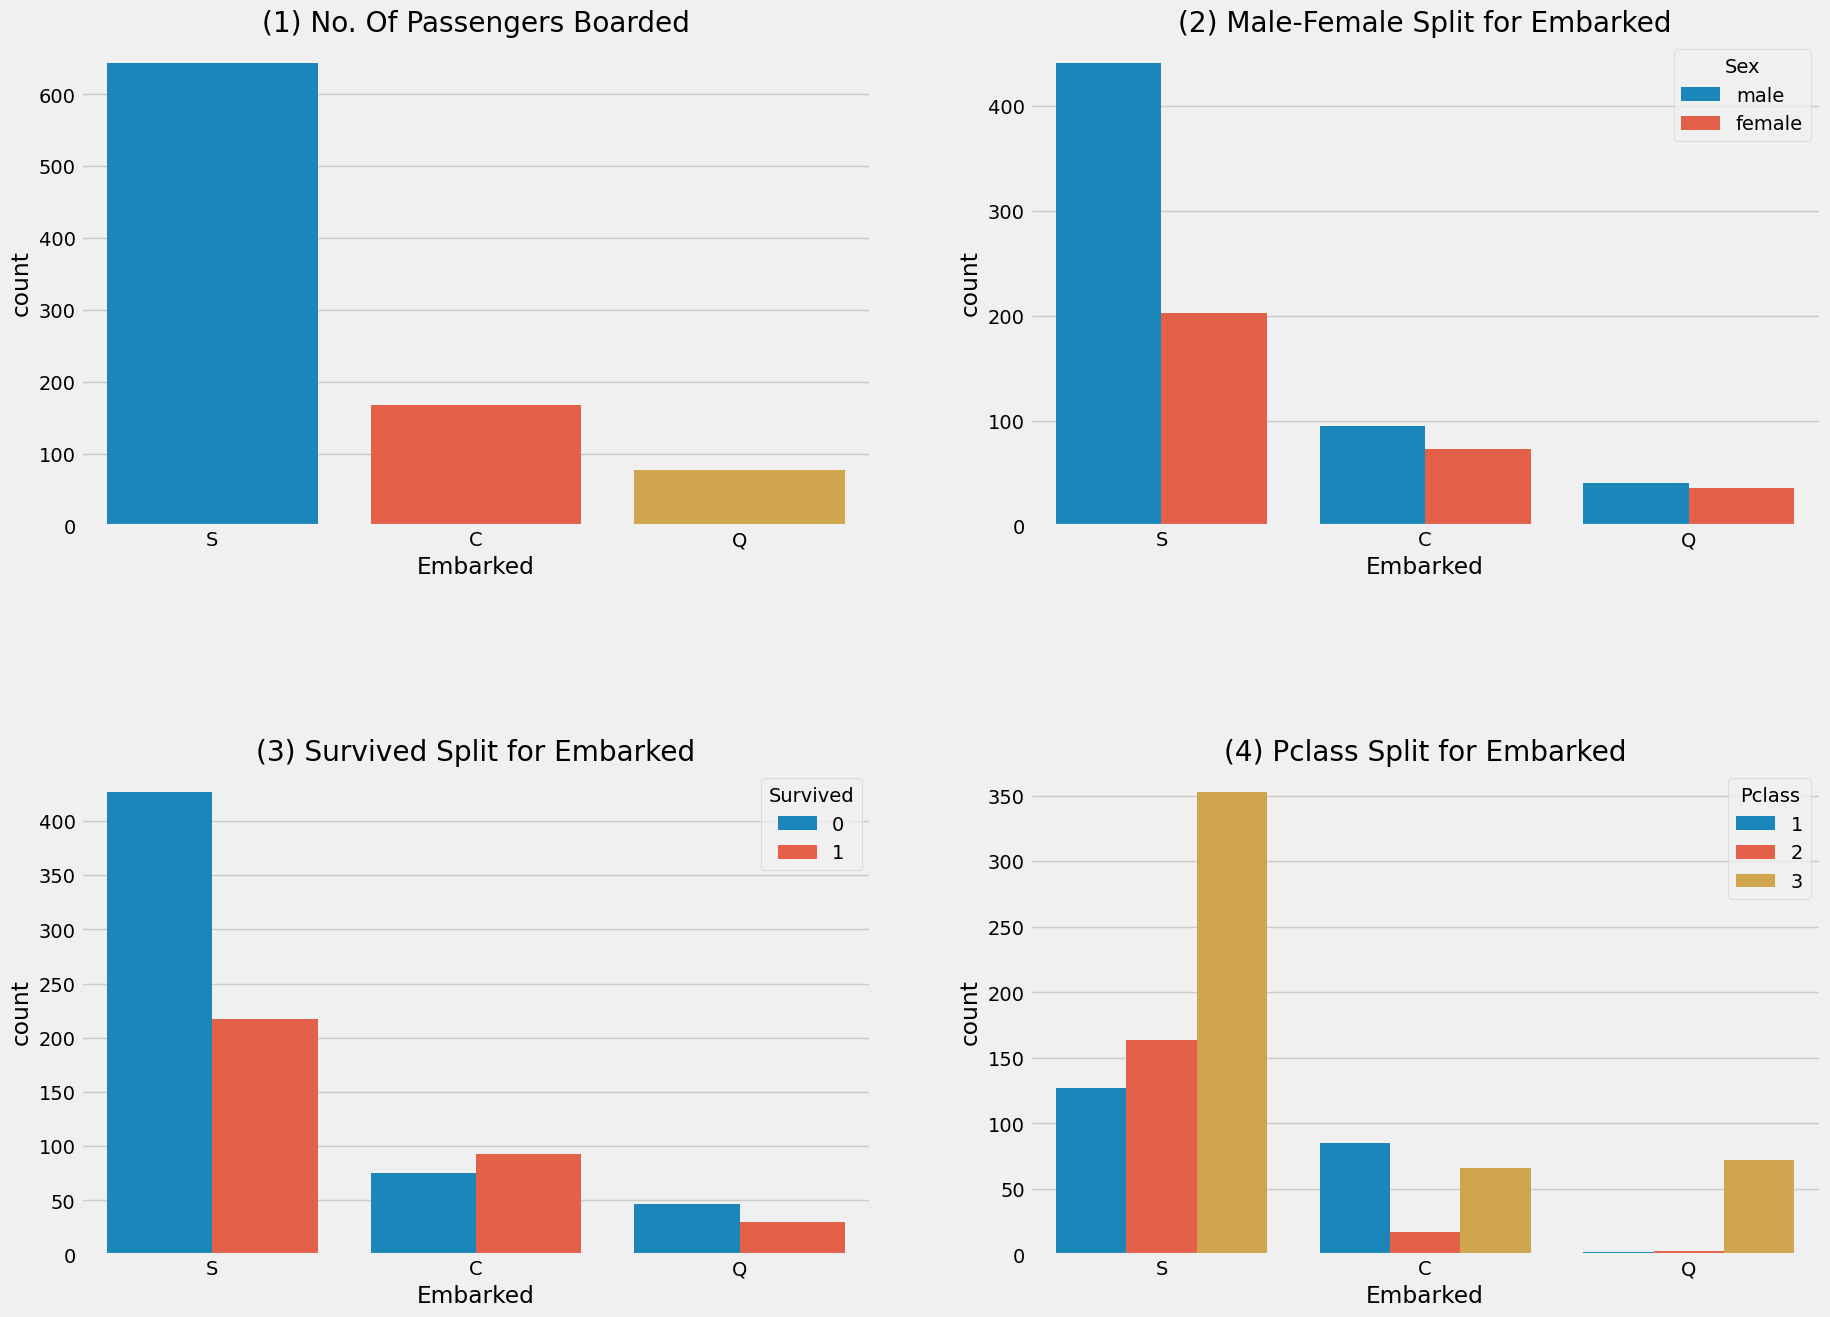

In [48]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot(x = 'Embarked', data = df_train, ax = ax[0, 0]) #[0, 0] 모두에 그린다는 말?
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Survived',data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Survived Split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Pclass Split for Embarked')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

#### 3-6 Family 비교 분석 

In [54]:
#형제, 자매 + 부모 , 자녀를 합치면 Family가 되기 때문에 Family로 합쳐서 분석한다. 

df_train['FamilySize']= df_train['SibSp'] + df_train['Parch'] + 1 #자기 자신을 더해준다. 
df_test['FamilySize']= df_test['SibSp'] + df_test['Parch'] + 1 

In [55]:
print("Maximize size of family : ", df_train['FamilySize'].max())
print("Minimize size of family : ", df_train['FamilySize'].min())

Maximize size of family :  11
Minimize size of family :  1


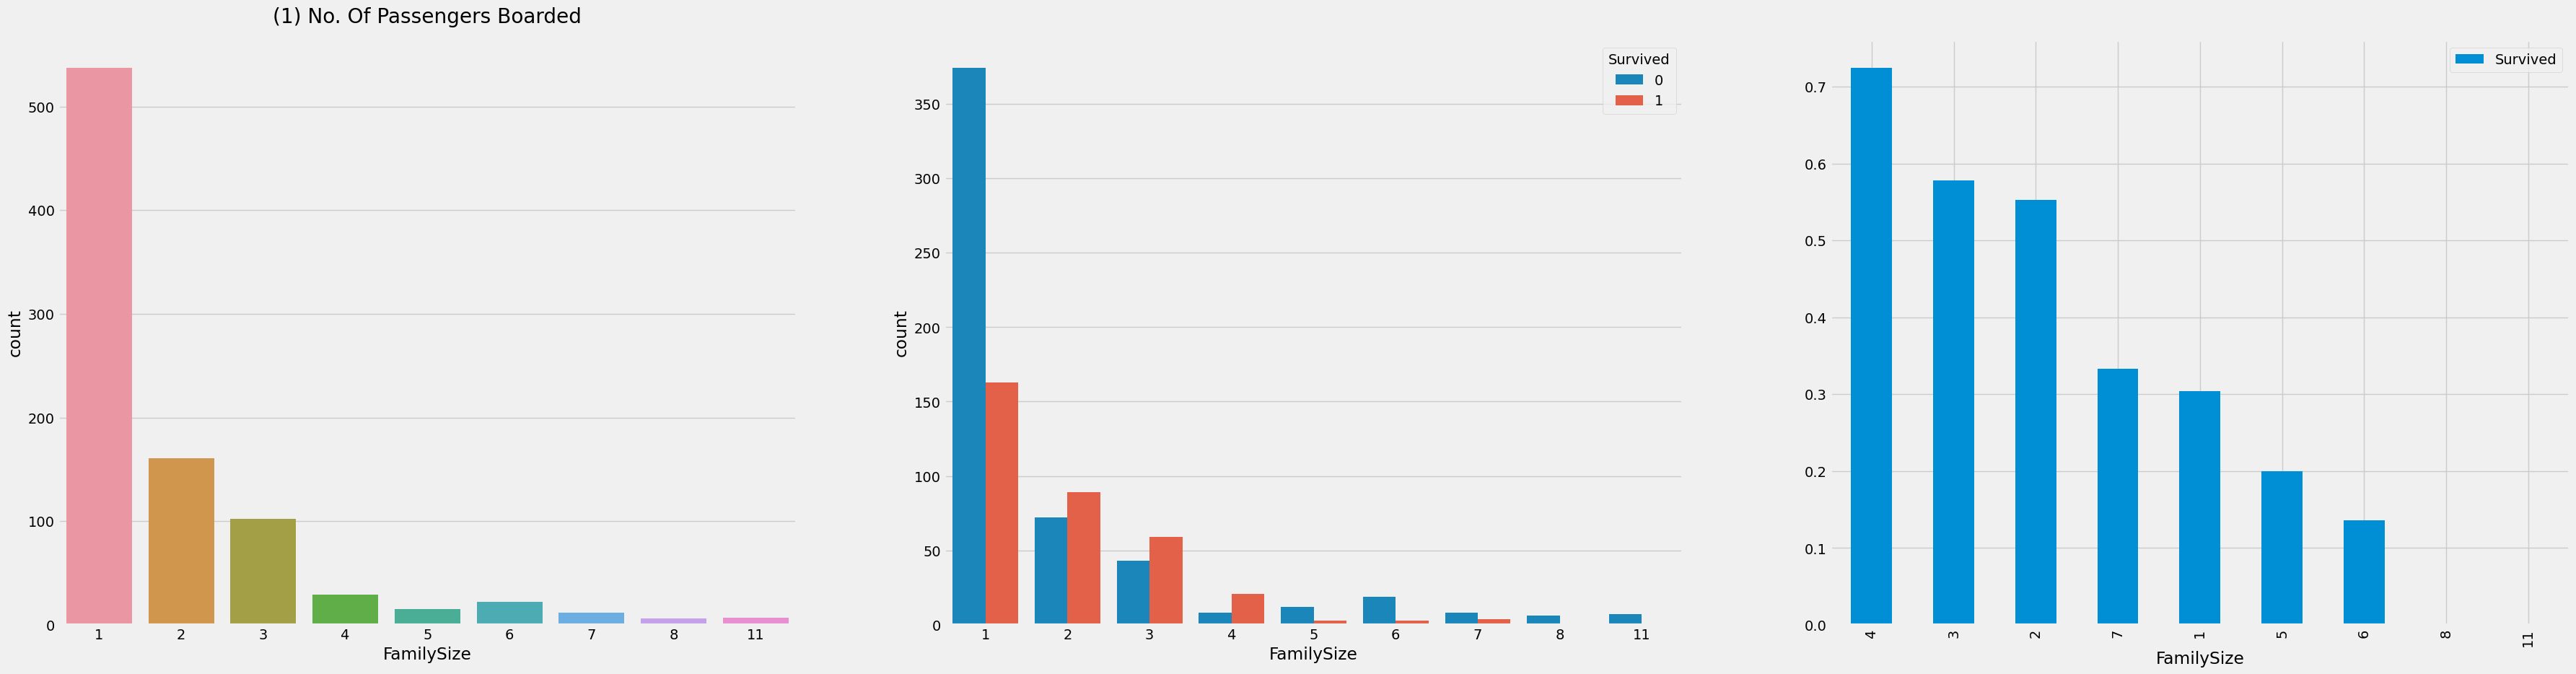

In [57]:
#생존 관계 파악

f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot(x = 'FamilySize', data = df_train, ax = ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded", y = 1.02)

sns.countplot(x = 'FamilySize', hue = 'Survived', data = df_train, ax = ax[1])
ax[0].set_title("(2) Survived countplot depending on FamilySize", y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[0].set_title("(1) No. Of Passengers Boarded", y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

#### 3-7 Fare 비교 분석 

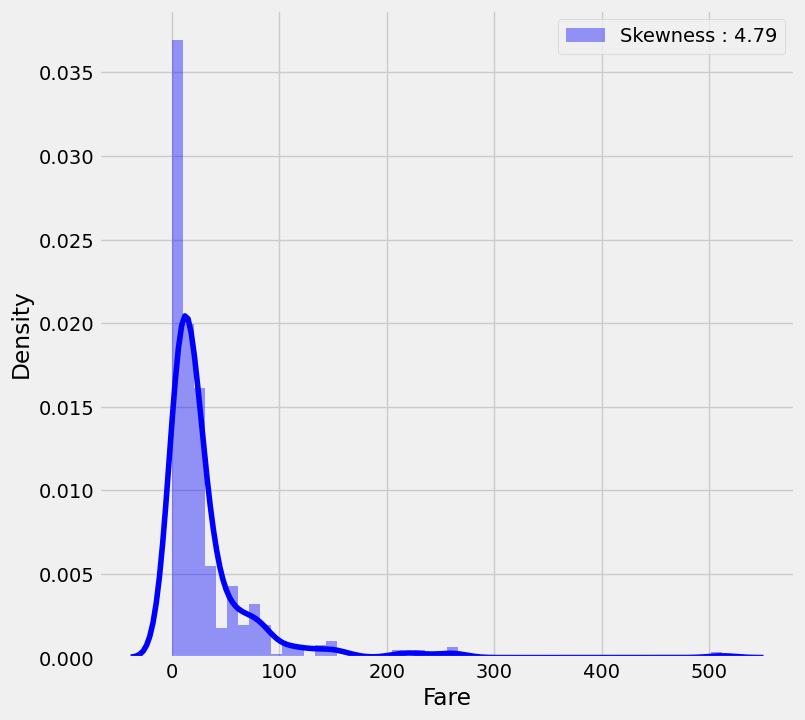

In [61]:
fig, ax = plt.subplots(1, 1, figsize= (8, 8))
#displot()을 사용하여 Fare에 대한 히스토글매과 커널 밀도 추정 곡선을 그린다.
#label은 그래프에 표시될 열의 왜도 값을 나타낸다. 
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
#범례를 설정하고 범례의 위치를 최적의 위치로 설정한다.
g = g.legend(loc='best')

In [68]:
#df_test에서 누락된 Fare의 값이 있다면, 그 값을 Fare의 평균값으로 설정한다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
#만약 Fare의 값이 0보다 큰 경우 np.log(i)를 적용하고 아니면 0을 적용한다. 
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

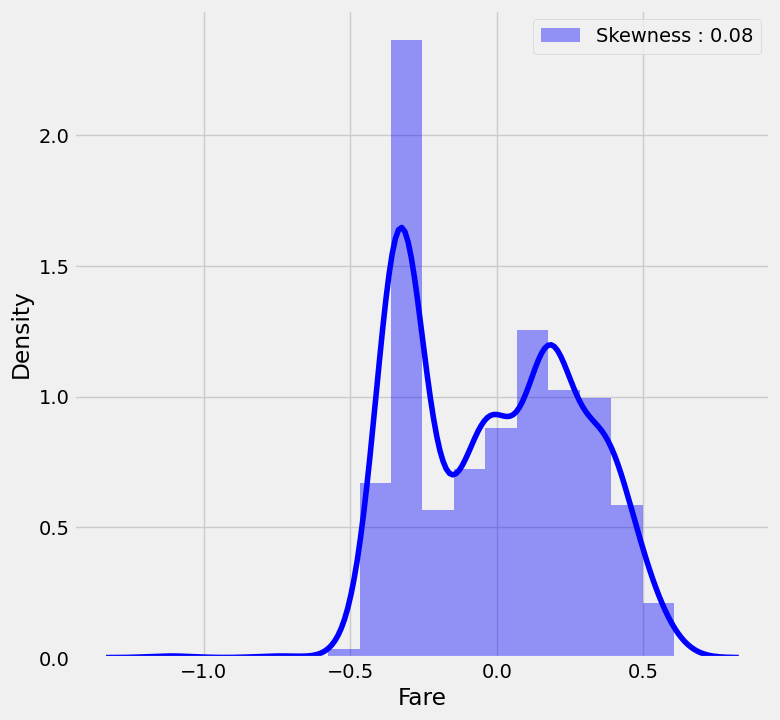

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc='best')

#### 3-8 Cabin 분석

(Cabin은 Null 값이 대략 80%이어서 생존에 영향을 미치는 중요한 부분을 얻어내기 어렵다.)

In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.380379,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.372137,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.318060,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.321586,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.307761,NaN,S,1


#### 3.9 Ticket 분석

In [71]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

ticket 번호가 너무 다양하여 특징을 이끌어와 생존과 연결하기 어렵다는 것을 알 수 있다. 